# Imports

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Variables 
image_path: str = '../../images/lane-detection-test-image.png'

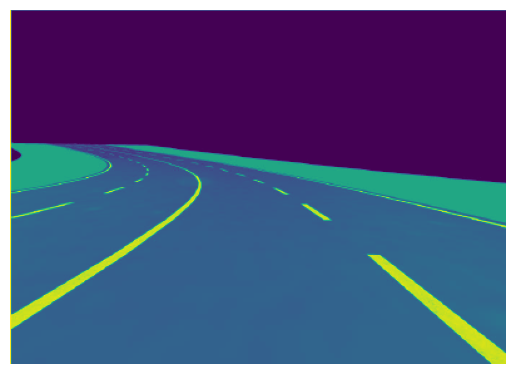

In [18]:
# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Display the image using Matplotlib
plt.imshow(image)
plt.axis("off")
plt.show()

## Apply Gaussian blur to reduce noise

Applying blur, typically Gaussian blur, before performing Canny edge detection is an important step for several reasons:

1. Noise reduction:
    - Images often contain high-frequency noise, such as sensor noise or texture details.
    - Blurring the image helps to smooth out and reduce this noise.
    - Noise can create false edges or interfere with the edge detection process, leading to inaccurate results.
    - By applying blur, we effectively suppress the noise and improve the reliability of edge detection.
2.Smoothing:
    - Blurring the image helps to smooth out small variations in pixel intensities.
    - This smoothing effect reduces the sensitivity of the edge detection algorithm to minor intensity changes.
    - It allows the algorithm to focus on more significant intensity changes that correspond to actual edges in the image.
    - Smoothing helps to eliminate small, insignificant edges and enhance the detection of true edges.
3. Scale invariance:
    - **The amount of blurring applied can be controlled by the size of the Gaussian kernel.**
    - By adjusting the kernel size, we can control the scale at which edges are detected.
    - Larger kernel sizes will blur the image more, reducing the sensitivity to fine details and detecting edges at a coarser scale.
    - Smaller kernel sizes will preserve more details and detect edges at a finer scale.
    - This scale invariance allows the Canny edge detection algorithm to adapt to different levels of detail in the image.
4. Gradient estimation:
    - The Canny edge detection algorithm relies on estimating the intensity gradients in the image.
    - Blurring the image before computing the gradients helps to reduce the influence of noise on the gradient estimation.
    - It provides a more stable and accurate estimation of the gradients, which is crucial for precise edge localization.
    - Without blurring, the gradients may be sensitive to noise and small variations, leading to less reliable edge detection.


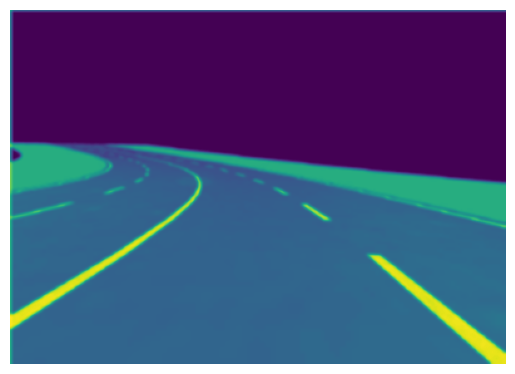

In [19]:

gaussian_kernel_size = (5, 5)
"""
- This argument represents the size of the Gaussian kernel.
- It is a tuple specifying the width and height of the kernel.
- In this case, the kernel size is set to (5, 5), which means a 5x5 square kernel will be used for blurring.
- The kernel size should be an odd number to ensure that there is a center pixel.
- Larger kernel sizes will result in more intense blurring, while smaller kernel sizes will produce less blurring.
"""

sigma_standard_deviation = 0
"""
- This argument represents the standard deviation (sigma) of the Gaussian distribution in the X and Y directions.
- It determines the amount of blurring applied to the image.
- When set to 0, as in this case, 
    OpenCV automatically calculates the standard deviation based on the kernel size using the formula: 
        sigma = 0.3 * ((ksize - 1) * 0.5 - 1) + 0.8.
- If you want to specify a different standard deviation, you can provide a positive value instead of 0.
"""


blurred = cv2.GaussianBlur(image, gaussian_kernel_size, sigma_standard_deviation)

plt.imshow(blurred)
plt.axis("off")
plt.show()

## Perform canny edge detection to detect edges

In the code snippet you provided, the two thresholds used in the cv2.Canny() function are lower_threshold and upper_threshold.

1. lower_threshold:
    - It represents the lower threshold value for edge detection.
    - Pixels with gradient magnitudes below this threshold are considered non-edges and discarded.
    - In the given code, lower_threshold is set to 100.
2. upper_threshold:
    - It represents the upper threshold value for edge detection.
    - Pixels with gradient magnitudes above this threshold are considered strong edges and retained.
    - Pixels with gradient magnitudes between the lower and upper thresholds are considered weak edges.
    - Weak edges are included in the final edge map only if they are connected to strong edges.
    - In the given code, upper_threshold is set to 200.

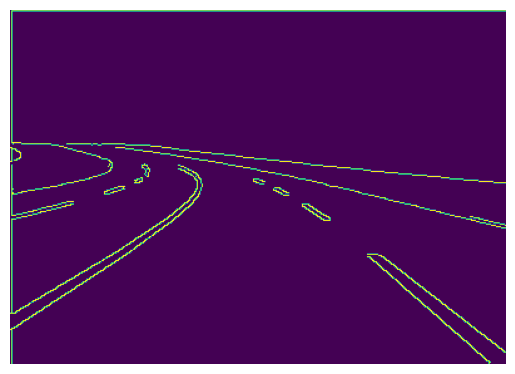

In [20]:
lower_threshold: int = 100
upper_threshold: int = 200
edges: np.ndarray  = cv2.Canny(blurred, lower_threshold, upper_threshold)

plt.imshow(edges)
plt.axis("off")
plt.show()

In [21]:
edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255, 255],
       [  0, 255,   0, ...,   0,   0,   0],
       ...,
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0]], dtype=uint8)

In [22]:
edges.shape, image.shape

((283, 396), (283, 396))